<AxesSubplot:title={'center':"Average value of wine's quality"}, xlabel='quality'>

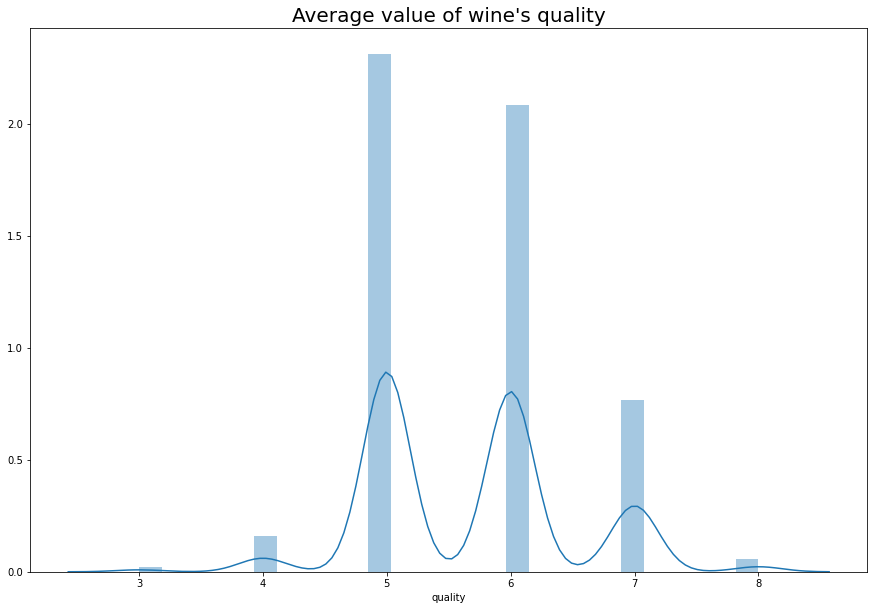

In [5]:
# a) linear regression with 11 features
import pandas as pd
import seaborn as sns

# the result from graph show that most of the time, the average value of the wine's quality is either 5 or 6
old_df = pd.read_csv('wine.csv', sep=';', engine='python')
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.title(label="Average value of wine's quality", fontsize=20, color="black") 
sns.distplot(old_df['quality'])

In [2]:
import pandas as pd 
import csv
import io

df = pd.read_csv('wine.csv', sep=';', engine='python')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,8.625271,0.519133,0.293353,2.564470,0.089266,15.242702,46.884070,0.997059,3.298582,0.665738,10.383069,5.664721
std,1.781795,0.179208,0.196751,1.264441,0.048310,10.210406,33.949177,0.001878,0.156161,0.175921,1.091891,0.809593
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.300000,0.390000,0.120000,1.900000,0.071000,7.000000,21.000000,0.996000,3.195000,0.560000,9.500000,5.000000
50%,8.300000,0.500000,0.290000,2.200000,0.080000,13.000000,38.000000,0.997020,3.300000,0.620000,10.000000,6.000000
75%,9.600000,0.630000,0.450000,2.700000,0.092000,21.000000,63.000000,0.998175,3.390000,0.735000,11.000000,6.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003200,3.900000,2.000000,14.900000,8.000000


In [3]:
# finding correlations between each feature of dataset using corr() with target quality
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.149037
volatile acidity       -0.379885
citric acid             0.228205
residual sugar          0.049020
chlorides              -0.124468
free sulfur dioxide    -0.074971
total sulfur dioxide   -0.226884
density                -0.192464
pH                     -0.075664
sulphates               0.211381
alcohol                 0.505369
Name: quality, dtype: float64


<AxesSubplot:>

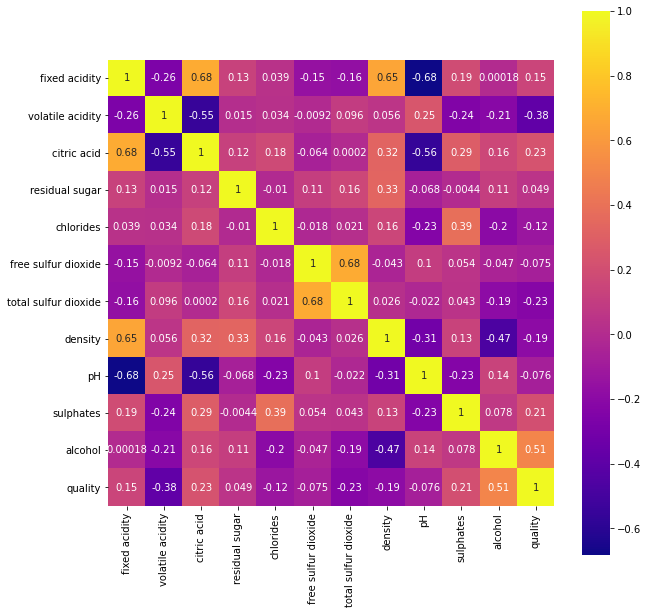

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# draw a heatmap and show a detailed diagram of correlation
fig = plt.subplots(figsize = (10,10)) # confusion matrix
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='plasma')

In [6]:
# get 11 features of wine
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
x = df[features] # vector x contain input features
y = df['quality'] # vector y contain the quality variable

In [343]:
from sklearn.model_selection import train_test_split

# use 25% of the data for testing and 75% of the data for training
# test_size default: 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3)

In [344]:
from sklearn.linear_model import LinearRegression

# fit linear regression to train data
reg = LinearRegression(fit_intercept=True, normalize=True)
reg.fit(x_train,y_train)

LinearRegression(normalize=True)

In [345]:
print("Coefficients of 11 features selected")
reg.coef_

Coefficients of 11 features selected


array([ 4.38703399e-03, -1.09479619e+00, -1.79606510e-01,  2.55438934e-02,
       -1.42418667e+00,  1.23900322e-03, -3.21179072e-03, -2.26704560e+00,
       -3.18296885e-01,  7.27243219e-01,  3.05057397e-01])

In [346]:
# this result show that the quality of our wine had lost 61%
accuracy = reg.score(x_test, y_test)
print("Accuracy of wine quality: {}%".format(int(round(accuracy*100))))

Accuracy of wine quality: 39%


In [12]:
# predict the quality of wine with this model
train_prediction = reg.predict(x_train)
train_prediction

array([5.14412248, 5.47406915, 5.81166098, 6.23128057, 6.15143523,
       5.94046978, 5.33570375, 4.76115935, 6.57206854, 5.76179596,
       5.08519025, 5.1007161 , 5.46675785, 5.46297375, 5.6177307 ,
       5.11106893, 5.61384821, 6.13785781, 5.73730621, 5.40353558,
       6.46577481, 5.21604956, 5.10081405, 6.02942595, 5.32189952,
       5.99892529, 5.41944577, 5.48201556, 6.36259543, 6.70599289,
       5.35062833, 5.33674381, 6.39752321, 5.95562369, 5.02681632,
       5.09116416, 5.56497785, 4.8440292 , 6.16302923, 4.81500577,
       5.6378806 , 5.89502843, 6.20869224, 5.58882881, 5.18087949,
       6.27218383, 5.32992231, 6.12154402, 6.01644725, 5.11771706,
       4.98102796, 5.04836334, 6.26632334, 5.57091986, 5.79657762,
       6.08662847, 6.0691892 , 6.08453145, 6.20517483, 6.35064696,
       6.50641769, 5.92800967, 6.27171758, 6.1364495 , 5.22212038,
       5.48009449, 6.1575842 , 5.48325466, 6.51508557, 5.19539719,
       6.20788913, 6.03178676, 5.3173177 , 5.93557039, 5.40599

In [13]:
test_prediction = reg.predict(x_test)
test_prediction

array([6.67105052, 5.58531903, 5.55763176, 5.1950985 , 5.88468584,
       6.02505557, 5.0411515 , 5.69447218, 5.09190419, 6.34161314,
       5.44856368, 6.2192812 , 5.81434274, 5.00418577, 5.87261972,
       6.04142361, 4.9195029 , 6.42460261, 6.06757783, 5.26327298,
       5.07852466, 5.05303804, 5.61384821, 5.70486683, 4.87668867,
       5.06284419, 5.42663661, 5.73383837, 5.15915247, 6.05130865,
       5.08325106, 5.22822908, 5.80283889, 5.88468584, 4.88482248,
       5.13297146, 5.19482271, 5.27774207, 5.93785419, 6.28511341,
       6.56069032, 5.57645204, 5.07852466, 5.65385994, 6.51088894,
       6.07135422, 5.48532324, 5.52291764, 5.81043991, 5.35885423,
       5.8037625 , 4.90546796, 5.69818443, 6.82961963, 4.88454492,
       5.39042561, 5.4851829 , 6.21865658, 5.33674381, 5.67236234,
       5.54081548, 5.27121244, 6.46484051, 5.92561508, 5.43264206,
       5.27039053, 6.34369214, 6.86352331, 5.97798187, 5.21278697,
       5.73806666, 5.29079841, 5.96657873, 6.36308246, 6.15109

In [14]:
from sklearn import metrics

# compute mean squared error for training as well as testing set
# rmse is used measure of the differences between values (sample and population values) 
# predict by a model and the values actually observed
train_rmse = metrics.mean_squared_error(train_prediction, y_train) ** 0.5
train_rmse

0.6508060491195332

In [15]:
# rmse for the testing = 0.6 < 0.65(rmse for the training), it means we've goodly overfit the data
test_rmse = metrics.mean_squared_error(test_prediction, y_test) ** 0.5
test_rmse

0.6045057375250391

In [16]:
import numpy as np

# round off predicted values for test set
predicted_data = np.round_(test_prediction)
predicted_data

array([7., 6., 6., 5., 6., 6., 5., 6., 5., 6., 5., 6., 6., 5., 6., 6., 5.,
       6., 6., 5., 5., 5., 6., 6., 5., 5., 5., 6., 5., 6., 5., 5., 6., 6.,
       5., 5., 5., 5., 6., 6., 7., 6., 5., 6., 7., 6., 5., 6., 6., 5., 6.,
       5., 6., 7., 5., 5., 5., 6., 5., 6., 6., 5., 6., 6., 5., 5., 6., 7.,
       6., 5., 6., 5., 6., 6., 6., 5., 5., 6., 6., 5., 6., 6., 6., 5., 5.,
       5., 5., 6., 5., 5., 6., 5., 6., 5., 6., 7., 5., 7., 5., 5., 6., 6.,
       6., 5., 6., 6., 6., 5., 6., 5., 6., 6., 7., 6., 5., 6., 7., 6., 5.,
       6., 5., 5., 6., 6., 5., 5., 5., 7., 5., 7., 6., 5., 6., 5., 5., 6.,
       6., 5., 6., 5., 6., 6., 6., 6., 5., 6., 5., 5., 7., 5., 6., 5., 6.,
       5., 6., 6., 6., 6., 6., 6., 7., 5., 6., 6., 6., 6., 5., 6., 5., 6.,
       6., 6., 5., 6., 6., 5., 6., 5., 6., 6., 6., 5., 5., 6., 6., 7., 6.,
       5., 6., 5., 6., 5., 6., 6., 5., 6., 5., 5., 5., 5., 6., 6., 6., 5.,
       6., 6., 6., 5., 5., 6., 5., 6., 7., 5., 5., 6., 6., 6., 5., 6., 6.,
       6., 6., 5., 5., 5.

In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, test_prediction)) # mean absolute error
print('MSE:', metrics.mean_squared_error(y_test, test_prediction)) # mean square error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_prediction))) # root mean square error

MAE: 0.4853445790650041
MSE: 0.3654271867006915
RMSE: 0.6045057375250391


In [18]:
# display coeffecients of 11 features
# Base on these result, if we hold all other features fixed, 1 unit increase in sulphates will lead to 
# an increase of 0.7 units in the quality of wine. Also, 1 unit increase in volatile acidity will lead 
# to a decrease of 1.09 units in quality of wine and similarly for the other features
coeffecients = pd.DataFrame(reg.coef_, features, columns=['Coeffecient of 11 features'])
coeffecients

,Coeffecient of 11 features
fixed acidity,0.004387
volatile acidity,-1.094796
citric acid,-0.179607
residual sugar,0.025544
chlorides,-1.424187
free sulfur dioxide,0.001239
total sulfur dioxide,-0.003212
density,-2.267046
pH,-0.318297
sulphates,0.727243


In [19]:
# compare actual outcome x_test with the predicted values
df = pd.DataFrame({'Actual outcome': y_test, 'Predicted values': test_prediction})
df1 = df.head(15)
df1

,Actual outcome,Predicted values
1038,7,6.671051
448,6,5.585319
804,6,5.557632
415,5,5.195098
290,7,5.884686
617,6,6.025056
600,4,5.041151
343,6,5.694472
360,5,5.091904
1168,6,6.341613


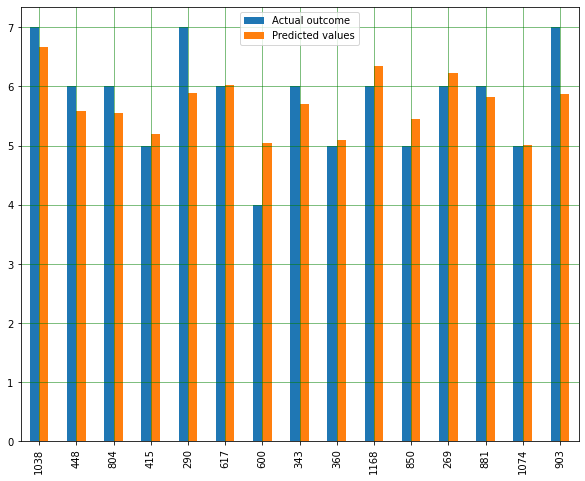

In [20]:
# bar graph show difference between actual outcome and predicted values
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [21]:
# as we can observe that mean value in all states is approximately 5.66, our RMSE is approximately 0.6*10=6 
# which is not greater than 10% of mean value in all states
# thus, we can conclude that our predictions were very accurate 
# it means the assumption that our data has a linear relationship is correct
# The linear model for prediction of wine's quality: 
# 0.004387*fixed acidity - 1.094796*volatile acidity +...+ 0.305057*alcohol + 5.667507
df.mean(axis=0)

Actual outcome      5.683333
Predicted values    5.667507
dtype: float64

In [22]:
# z-score = (xi - u) / sigma
df_zscore = (old_df - old_df.mean()) / old_df.std()
df_zscore.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03
mean,1.659316e-16,-3.733461e-16,-1.896361e-16,1.422271e-16,-1.422271e-16,4.444596e-18,-3.555677e-17,-3.192998e-14,8.296579e-16,-1.896361e-16,9.481805e-17,-5.096470e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.259110e+00,-2.227207e+00,-1.490985e+00,-1.316368e+00,-1.599367e+00,-1.394920e+00,-1.204273e+00,-3.721177e+00,-3.576972e+00,-1.908460e+00,-1.816179e+00,-3.291433e+00
25%,-7.437841e-01,-7.205751e-01,-8.810771e-01,-5.255051e-01,-3.780978e-01,-8.072844e-01,-7.624359e-01,-5.636620e-01,-6.633053e-01,-6.010547e-01,-8.087523e-01,-8.210555e-01
50%,-1.825524e-01,-1.067622e-01,-1.704080e-02,-2.882462e-01,-1.918025e-01,-2.196487e-01,-2.616873e-01,-2.054807e-02,9.079423e-03,-2.599924e-01,-3.508311e-01,4.141334e-01
75%,5.470487e-01,6.186531e-01,7.961698e-01,1.071854e-01,5.659123e-02,5.638657e-01,4.747075e-01,5.944486e-01,5.854092e-01,3.937103e-01,5.650114e-01,4.141334e-01
max,4.082808e+00,4.524735e+00,3.591581e+00,1.023023e+01,1.079962e+01,5.167013e+00,7.131717e+00,3.270083e+00,3.851278e+00,7.584440e+00,4.136797e+00,2.884511e+00


In [23]:
print("Standard deviations\n", old_df.std())
print("\nAverages\n", old_df.mean())

Standard deviations
 fixed acidity            1.781795
volatile acidity         0.179208
citric acid              0.196751
residual sugar           1.264441
chlorides                0.048310
free sulfur dioxide     10.210406
total sulfur dioxide    33.949177
density                  0.001878
pH                       0.156161
sulphates                0.175921
alcohol                  1.091891
quality                  0.809593
dtype: float64

Averages
 fixed acidity            8.625271
volatile acidity         0.519133
citric acid              0.293353
residual sugar           2.564470
chlorides                0.089266
free sulfur dioxide     15.242702
total sulfur dioxide    46.884070
density                  0.997059
pH                       3.298582
sulphates                0.665738
alcohol                 10.383069
quality                  5.664721
dtype: float64


In [24]:
# R^2 (coefficient of deterination) = 1 - (sigma(i=0->m)(y(i)-y_hat(i))^2 / sigma(i=0->m)(y(i)-mean(y))^2)
print("R-score:", reg.score(x, y)) # calculate R^2 score

R-score: 0.3754620134953237


In [25]:
# b) linear regression with one feature
from sklearn.model_selection import cross_val_score

new_df = pd.read_csv('wine.csv', sep=';', engine='python')
# vector new_x contain input features
new_x1 = new_df['fixed acidity'].values.reshape(-1, 1)
new_x2 = new_df['volatile acidity'].values.reshape(-1, 1)
new_x3 = new_df['citric acid'].values.reshape(-1, 1)
new_x4 = new_df['residual sugar'].values.reshape(-1, 1)
new_x5 = new_df['chlorides'].values.reshape(-1, 1)
new_x6 = new_df['free sulfur dioxide'].values.reshape(-1, 1)
new_x7 = new_df['total sulfur dioxide'].values.reshape(-1, 1)
new_x8 = new_df['density'].values.reshape(-1, 1)
new_x9 = new_df['pH'].values.reshape(-1, 1)
new_x10 = new_df['sulphates'].values.reshape(-1, 1)
new_x11 = new_df['alcohol'].values.reshape(-1, 1)
new_y = new_df['quality'] # vector y contain the quality variable
new_reg=LinearRegression()

In [27]:
# the accuracy of the model is the average of the accuracy of each fold
# kfold=5, dataset'll be divided into 5 parts, 1 part for testing and 4 parts for training
scores1 = cross_val_score(new_reg, new_x1, new_y, scoring="neg_mean_squared_error", cv=5) 
scores2 = cross_val_score(new_reg, new_x2, new_y, scoring="neg_mean_squared_error", cv=5) 
scores3 = cross_val_score(new_reg, new_x3, new_y, scoring="neg_mean_squared_error", cv=5) 
scores4 = cross_val_score(new_reg, new_x4, new_y, scoring="neg_mean_squared_error", cv=5) 
scores5 = cross_val_score(new_reg, new_x5, new_y, scoring="neg_mean_squared_error", cv=5) 
scores6 = cross_val_score(new_reg, new_x6, new_y, scoring="neg_mean_squared_error", cv=5) 
scores7 = cross_val_score(new_reg, new_x7, new_y, scoring="neg_mean_squared_error", cv=5) 
scores8 = cross_val_score(new_reg, new_x8, new_y, scoring="neg_mean_squared_error", cv=5) 
scores9 = cross_val_score(new_reg, new_x9, new_y, scoring="neg_mean_squared_error", cv=5) 
scores10 = cross_val_score(new_reg, new_x10, new_y, scoring="neg_mean_squared_error", cv=5) 
scores11 = cross_val_score(new_reg, new_x11, new_y, scoring="neg_mean_squared_error", cv=5) 

In [28]:
# min standard deviation/most square error of feature -> best choice for prediction
print("Standard deviation of feature fixed acidity:", np.std(scores1))
print("\nStandard deviation of feature volatile acidity:", np.std(scores2))
print("\nStandard deviation of feature citric acid:", np.std(scores3))
print("\nStandard deviation of feature residual sugar:", np.std(scores4))
print("\nStandard deviation of feature chlorides:", np.std(scores5))
print("\nStandard deviation of feature free sulfur dioxide:", np.std(scores6))
print("\nStandard deviation of feature total sulfur dioxide:", np.std(scores7))
print("\nStandard deviation of feature density:", np.std(scores8))
print("\nStandard deviation of feature pH:", np.std(scores9))
print("\nStandard deviation of feature sulphates:", np.std(scores10))
print("\nStandard deviation of feature alcohol:", np.std(scores11))

print("\n\nMAE of feature fixed acidity:", np.mean(np.abs(scores1)))
print("\nMAE of feature volatile acidity:", np.mean(np.abs(scores2)))
print("\nMAE of feature citric acid:", np.mean(np.abs(scores3)))
print("\nMAE of feature residual sugar:", np.mean(np.abs(scores4)))
print("\nMAE of feature chlorides:", np.mean(np.abs(scores5)))
print("\nMAE of feature free sulfur dioxide:", np.mean(np.abs(scores6)))
print("\nMAE of feature total sulfur dioxide:", np.mean(np.abs(scores7)))
print("\nMAE of feature density:", np.mean(np.abs(scores8)))
print("\nMAE of feature pH:", np.mean(np.abs(scores9)))
print("\nMAE of feature sulphates:", np.mean(np.abs(scores10)))
print("\nMAE of feature alcohol:", np.mean(np.abs(scores11)))

# our mse is negative, so we convert to positive and calculate average rmse
print("\n\nAverage RMSE of feature fixed acidity:", np.sqrt(-scores1).mean())
print("\nAverage RMSE of feature volatile acidity:", np.sqrt(-scores2).mean())
print("\nAverage RMSE of feature citric acid:", np.sqrt(-scores3).mean())
print("\nAverage RMSE of feature residual sugar:", np.sqrt(-scores4).mean())
print("\nAverage RMSE of feature chlorides:", np.sqrt(-scores5).mean())
print("\nAverage RMSE of feature free sulfur dioxide:", np.sqrt(-scores6).mean())
print("\nAverage RMSE of feature total sulfur dioxide:", np.sqrt(-scores7).mean())
print("\nAverage RMSE of feature density:", np.sqrt(-scores8).mean())
print("\nAverage RMSE of feature pH:", np.sqrt(-scores9).mean())
print("\nAverage RMSE of feature sulphates:", np.sqrt(-scores10).mean())
print("\nAverage RMSE of feature alcohol:", np.sqrt(-scores11).mean())

Standard deviation of feature fixed acidity: 0.07314641281064758

Standard deviation of feature volatile acidity: 0.040652387569969944

Standard deviation of feature citric acid: 0.04781653464465017

Standard deviation of feature residual sugar: 0.05024941847338933

Standard deviation of feature chlorides: 0.04684997760740848

Standard deviation of feature free sulfur dioxide: 0.05238878730230577

Standard deviation of feature total sulfur dioxide: 0.06336801795934105

Standard deviation of feature density: 0.06338821197355547

Standard deviation of feature pH: 0.04909162308324163

Standard deviation of feature sulphates: 0.07005500819326839

Standard deviation of feature alcohol: 0.03744000574168895


MAE of feature fixed acidity: 0.6768993718681756

MAE of feature volatile acidity: 0.5777672979690975

MAE of feature citric acid: 0.6452007859040061

MAE of feature residual sugar: 0.6824197607972581

MAE of feature chlorides: 0.6719621391989394

MAE of feature free sulfur dioxide: 0.67

In [29]:
# as we can see above, almost standard deviation and MAE, RMSE of feature alcohol have min value
# RMSE is something we want to minimize
# so, we choose alcohol as a best feature for our model
b_features = ['alcohol']
b_x = new_df[b_features] 
b_y = new_df['quality'] 
# use 25% of the data for testing and 75% of the data for training
# test_size default: 0.25
b_x_train, b_x_test, b_y_train, b_y_test = train_test_split(b_x, b_y, random_state=3)

In [30]:
# fit linear regression to train data
b_reg = LinearRegression()
b_reg.fit(b_x_train, b_y_train)

LinearRegression()

In [31]:
# this result show that the quality of our wine had lost 76% if we just use one feature 
b_accuracy = b_reg.score(b_x_test, b_y_test)
print("Accuracy of wine quality: {}%".format(int(round(b_accuracy*100))))

Accuracy of wine quality: 24%


In [32]:
# predict the quality of wine with this model
b_train_prediction = b_reg.predict(b_x_train)
b_train_prediction

array([5.28059552, 5.35736529, 5.8947537 , 6.08667813, 6.04829324,
       6.00990836, 5.24221063, 5.28059552, 6.43214211, 5.77959904,
       5.31898041, 5.39575018, 5.35736529, 5.31898041, 5.70282927,
       5.28059552, 5.70282927, 6.04829324, 5.51090484, 5.47251995,
       6.24021768, 5.54928972, 5.20382575, 5.93313859, 5.43413506,
       5.66444438, 5.39575018, 5.47251995, 5.85636881, 6.54729676,
       5.35736529, 5.31898041, 6.20183279, 5.43413506, 5.16544086,
       5.20382575, 5.77959904, 5.24221063, 5.70282927, 5.28059552,
       5.81798393, 5.93313859, 5.97152347, 5.74121415, 5.39575018,
       5.43413506, 5.39575018, 5.81798393, 6.04829324, 5.58767461,
       5.28059552, 5.47251995, 5.85636881, 5.81798393, 5.70282927,
       6.04829324, 5.97152347, 5.8947537 , 5.97152347, 5.97152347,
       6.47052699, 5.81798393, 5.47251995, 5.97152347, 6.04829324,
       5.51090484, 6.00990836, 5.58767461, 6.27860256, 5.31898041,
       6.70083631, 5.97152347, 5.28059552, 6.08667813, 5.35736

In [33]:
b_test_prediction = b_reg.predict(b_x_test)
b_test_prediction

array([6.50891188, 5.58767461, 5.47251995, 5.24221063, 5.74121415,
       5.43413506, 5.51090484, 5.43413506, 5.28059552, 6.27860256,
       5.31898041, 5.54928972, 6.04829324, 5.20382575, 5.81798393,
       6.12506302, 5.31898041, 6.27860256, 5.85636881, 5.28059552,
       5.12705597, 5.51090484, 5.70282927, 5.85636881, 5.16544086,
       5.28059552, 5.74121415, 5.6260595 , 5.24221063, 5.93313859,
       5.20382575, 5.28059552, 5.28059552, 5.74121415, 5.12705597,
       5.28059552, 5.43413506, 5.20382575, 5.8947537 , 6.04829324,
       6.47052699, 5.47251995, 5.12705597, 5.39575018, 6.20183279,
       6.12506302, 5.54928972, 5.35736529, 5.39575018, 5.24221063,
       5.51090484, 5.24221063, 6.00990836, 6.77760608, 5.20382575,
       5.20382575, 5.6260595 , 6.1634479 , 5.31898041, 5.81798393,
       5.28059552, 5.16544086, 6.35537233, 5.77959904, 5.31898041,
       5.31898041, 6.20183279, 6.85437585, 5.8947537 , 5.43413506,
       5.51090484, 5.28059552, 5.70282927, 6.04829324, 5.89475

In [34]:
print('MAE:', metrics.mean_absolute_error(b_y_test, b_test_prediction)) # mean absolute error
print('MSE:', metrics.mean_squared_error(b_y_test, b_test_prediction)) # mean square error
print('RMSE:', np.sqrt(metrics.mean_squared_error(b_y_test, b_test_prediction))) # root mean square error

MAE: 0.5550020474436301
MSE: 0.4572137015719363
RMSE: 0.6761757919150436


In [35]:
# display coeffecient of 1 feature
# Base on this result, if we increase 1 unit in alcohol, it will lead to 
# an increase of 0.38 units in the quality of wine
b_coeffecients = pd.DataFrame(b_reg.coef_, b_features, columns=['Coeffecient of feature alcohol'])
b_coeffecients

,Coeffecient of feature alcohol
alcohol,0.383849


In [36]:
# compare actual outcome b_x_test with the predicted values
new_df = pd.DataFrame({'Actual outcome': b_y_test, 'Predicted values': b_test_prediction})
new_df1 = new_df.head(15)
new_df1

,Actual outcome,Predicted values
1038,7,6.508912
448,6,5.587675
804,6,5.472520
415,5,5.242211
290,7,5.741214
617,6,5.434135
600,4,5.510905
343,6,5.434135
360,5,5.280596
1168,6,6.278603


In [37]:
# as we can observe that mean value in all states is approximately 5.65, our RMSE is approximately 0.67*10=6.7 
# which is greater than 10% of mean value in all states
# thus, we can conclude that our predictions were not very accurate 
# it means the assumption that our data has a linear relationship is incorrect (in case we just use 1 feature for prediction)
# The linear model for prediction of wine's quality: 
# 0.383849*alcohol + 5.656256
new_df.mean(axis=0)

Actual outcome      5.683333
Predicted values    5.656256
dtype: float64

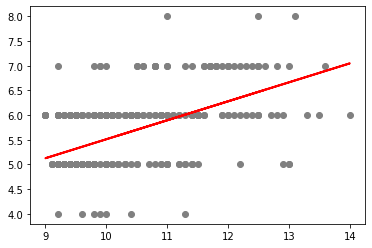

In [38]:
# the straight line in the bellow graph shows our algorithm is correct
plt.scatter(b_x_test, b_y_test,  color='gray')
plt.plot(b_x_test, b_test_prediction, color='red', linewidth=2)
plt.show()

In [39]:
print("R-score:", b_reg.score(b_x, b_y)) # calculate R^2 score

R-score: 0.25517562996472765


In [94]:
# c) build model for wine's prediction
c_df = pd.read_csv('wine.csv', sep=';', engine='python')
new_correlations = c_df.corr()['quality'].drop('quality')

In [185]:
# ouput only those features whose correclation is above a threshold value
def get_features(correlation_threshold):
    abs_corrs = new_correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

feature_cols = get_features(0.1) # take features with correclation more than 0.1
print(feature_cols) 
c_x = c_df[feature_cols] 
c_y = c_df['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


In [374]:
# after checking some features correspond to threshold
# I found that features with correclation more than 0.1 can give the min average rmse
# thus, 8 features above can make our model enough optimize
c_reg = LinearRegression()
c_scores = cross_val_score(c_reg, c_x, c_y, cv=10, scoring='neg_mean_squared_error')
print(np.sqrt(-c_scores).mean())

0.6496580131564936


In [379]:
# use 20% of the data for testing and 75% of the data for training
c_x_train, c_x_test, c_y_train, c_y_test = train_test_split(c_x, c_y, test_size=0.2,random_state=3)
c_reg.fit(c_x_train, c_y_train)

LinearRegression()

In [380]:
# this result show that the quality of our wine had lost 59% instead of 61% 
c_accuracy = c_reg.score(c_x_test, c_y_test)
print("Accuracy of wine quality: {}%".format(int(round(c_accuracy*100))))

Accuracy of wine quality: 41%


In [381]:
# predict the quality of wine with this model
c_train_prediction = c_reg.predict(c_x_train)
c_train_prediction

array([5.29821175, 5.46713646, 6.64101707, 5.93832769, 5.3550071 ,
       5.3833866 , 6.17261587, 5.6885673 , 5.40949426, 5.11759298,
       5.29453642, 5.45282017, 5.49788815, 5.2001242 , 5.91005607,
       5.35701267, 5.7825361 , 5.00290633, 5.82503417, 5.11738527,
       5.29160833, 5.7049682 , 5.36138462, 5.07639475, 5.5863564 ,
       5.76276846, 5.95847759, 6.98960395, 5.63313423, 5.69010974,
       5.86881269, 5.02186616, 5.75914496, 5.38653602, 5.43336897,
       5.49922977, 5.41573375, 6.04157126, 5.95511651, 5.44648689,
       6.40294114, 6.09443638, 5.92847381, 5.3636741 , 5.09936346,
       5.43035113, 5.35015561, 5.30151581, 5.13085836, 6.26496593,
       5.26125252, 6.39368733, 5.57954114, 5.70901537, 5.11202285,
       5.94032315, 5.65455578, 5.68708147, 5.4345335 , 5.58686514,
       5.14132899, 5.49922977, 5.79170334, 6.22154025, 6.15385003,
       5.95826404, 5.35597044, 4.77354206, 6.55407134, 5.72708744,
       5.11371788, 5.16799733, 5.46383186, 5.51015563, 5.70493

In [382]:
c_test_prediction = c_reg.predict(c_x_test)
c_test_prediction

array([6.54527383, 5.5648513 , 5.53194232, 5.13871601, 5.90919783,
       6.02666508, 5.00653535, 5.76859162, 5.0879743 , 6.26377849,
       5.46713646, 6.26295241, 5.83174322, 4.80124302, 5.75773327,
       6.02852501, 4.94017812, 6.38723273, 6.05701591, 5.26035438,
       5.08800931, 5.07544632, 5.5734084 , 5.72483547, 4.84490188,
       4.94560031, 5.43144901, 5.66292373, 5.19013962, 6.07314644,
       5.09548421, 5.23801119, 5.78967903, 5.90919783, 4.88749042,
       5.13691086, 5.21338716, 5.28829321, 5.94235082, 6.28857105,
       6.49436997, 5.666091  , 5.08800931, 5.67378681, 6.52904595,
       6.04783546, 5.49896158, 5.44648689, 5.87364544, 5.33824952,
       5.8279918 , 4.91049851, 5.67587256, 6.71943185, 4.90200047,
       5.35571204, 5.45912711, 6.2223751 , 5.31674888, 5.72110137,
       5.53207998, 5.31321338, 6.40447346, 6.00576202, 5.41408529,
       5.28709518, 6.32556914, 6.83949403, 5.98883004, 5.27625239,
       5.70623994, 5.34171511, 6.0152815 , 6.35688344, 6.14193

In [383]:
print('MAE:', metrics.mean_absolute_error(c_y_test, c_test_prediction)) # mean absolute error
print('MSE:', metrics.mean_squared_error(c_y_test, c_test_prediction)) # mean square error
print('RMSE:', np.sqrt(metrics.mean_squared_error(c_y_test, c_test_prediction))) # root mean square error

MAE: 0.4779846011036169
MSE: 0.352021108310656
RMSE: 0.5933136677261497


In [384]:
# display coeffecient of 8 features
# Base on this result, if we increase 1 unit in alcohol, it will lead to 
# an increase of 0.29 units in the quality of wine and similarly for the other features
c_coeffecients = pd.DataFrame(c_reg.coef_, feature_cols, columns=['Coeffecient of 8 features'])
c_coeffecients

,Coeffecient of 8 features
fixed acidity,0.030928
volatile acidity,-1.131757
citric acid,-0.209735
chlorides,-1.347837
total sulfur dioxide,-0.002548
density,-7.528725
sulphates,0.780400
alcohol,0.298130


In [385]:
# compare actual outcome c_x_test with the predicted values
c_df = pd.DataFrame({'Actual outcome': c_y_test, 'Predicted values': c_test_prediction})
c_df1 = c_df.head(15)
c_df1

,Actual outcome,Predicted values
1038,7,6.545274
448,6,5.564851
804,6,5.531942
415,5,5.138716
290,7,5.909198
617,6,6.026665
600,4,5.006535
343,6,5.768592
360,5,5.087974
1168,6,6.263778


In [386]:
# as we can observe that mean value in all states is approximately 5.68, our RMSE is approximately 0.59*10=5.9
# which is not greater than 10% of mean value in all states
# thus, we can conclude that our predictions were very accurate 
# it means the assumption that our data has a linear relationship is correct 
# The linear model for prediction of wine's quality: 
# 0.030928*fixed acidity +...+ 0.298130*alcohol + 5.680149
c_df.mean(axis=0)

Actual outcome      5.700000
Predicted values    5.680149
dtype: float64

In [387]:
print("R-score:", c_reg.score(c_x, c_y)) # calculate R^2 score

R-score: 0.37254822628567474
